In [27]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.lines import Line2D


In [28]:
mpl.rcParams['font.size'] = 17
mpl.rcParams['lines.linewidth']  = 2.0
mpl.rcParams['lines.markersize'] = 8.0 
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['axes.titlesize'] = 17
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 17

In [29]:
n_perturb = {
    'GPT-2': {
        'xsum': np.array([0.765, 0.895, 0.975, 0.973]),
        'squad': np.array([0.757, 0.896, 0.963, 0.963]),
        'writing': np.array([0.738, 0.904, 0.952, 0.965])
    },
    'GPT-J': {
        'xsum': np.array([0.714, 0.798, 0.893, 0.906]),
        'squad': np.array([0.666, 0.722, 0.824, 0.824]),
        'writing': np.array([0.596, 0.821, 0.878, 0.881])
    }
}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


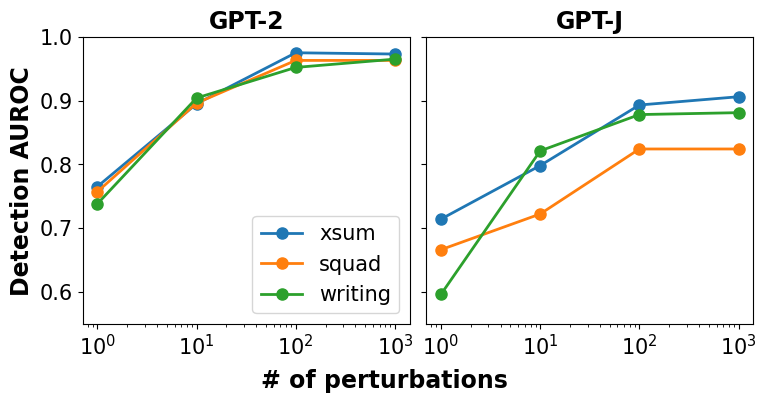

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=len(n_perturb), figsize=(8, 4), sharey=True)

n = np.array([1, 10, 100, 1000])
for i, (model_name, scores) in enumerate(n_perturb.items()):
    ax[i].set_title(model_name)
    ax[i].set_xscale('log')
    ax[i].set_xticks(n)
    if i == 0:
        ax[i].set_ylabel('Detection AUROC')
    ax[i].set_ylim(0.55, 1)
    ax[i].set_yticks(np.arange(0.6, 1.01, 0.1))
    for dataset_name, aurocs in scores.items():
        ax[i].plot(n, aurocs, label=dataset_name, marker='o', mew=1)
    if i == 0:
        ax[i].legend(loc='lower right')

fig.tight_layout()
fig.subplots_adjust(wspace=0.05)          # almost no gap
fig.supxlabel('# of perturbations', y=-0.02, fontweight='bold', fontsize=ax[0].yaxis.label.get_fontsize())
fig.savefig('n_perturb.eps', bbox_inches='tight', pad_inches=0)
fig.savefig('n_perturb.png', bbox_inches='tight', pad_inches=0, dpi=400)

In [31]:
scale = {
    '5 perturbations': {
        'GPT2-sm': {'rand_d': 0.760, 'rand_z': 0.589, 'mask': np.array([0.746, 0.896, 0.967, 0.971])},
        'GPT2-md': {'rand_d': 0.735, 'rand_z': 0.523, 'mask': np.array([0.639, 0.799, 0.905, 0.957])},
        'GPT2-lg': {'rand_d': 0.729, 'rand_z': 0.548, 'mask': np.array([0.608, 0.737, 0.878, 0.926])},
        'GPT2-xl': {'rand_d': 0.726, 'rand_z': 0.576, 'mask': np.array([0.621, 0.742, 0.831, 0.920])}
    },
    '25 perturbations': {
        'GPT2-sm': {'rand_d': 0.869, 'rand_z': 0.526, 'mask': np.array([0.828, 0.980, 0.998, 0.999])},
        'GPT2-md': {'rand_d': 0.864, 'rand_z': 0.537, 'mask': np.array([0.740, 0.916, 0.975, 0.996])},
        'GPT2-lg': {'rand_d': 0.742, 'rand_z': 0.532, 'mask': np.array([0.739, 0.888, 0.962, 0.993])},
        'GPT2-xl': {'rand_d': 0.849, 'rand_z': 0.530, 'mask': np.array([0.700, 0.851, 0.941, 0.984])}
    }
}

NOTE: For some reason the AUROC for the random filling setting for normalized (z) discrepancy is always very low (~0.5), but for non-normalized discrepancy (d) it's not. We report the latter, as it seems that in the paper the latter was reported, judging by their graphs, although this was never explicitly mentioned. This should be stated in the caption.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


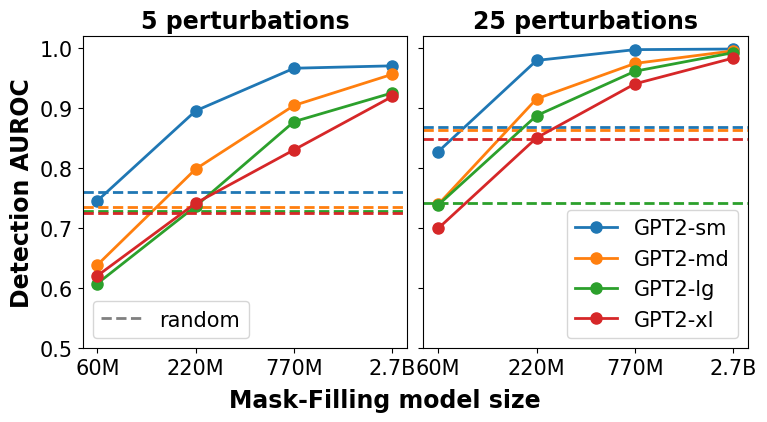

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=len(scale), figsize=(8, 4.2), sharey=True)

mask_model_sizes = ['60M', '220M', '770M', '2.7B']
for i, (num_perturb, scores) in enumerate(scale.items()):
    ax[i].set_title(num_perturb)
    if i == 0:
        ax[i].set_ylabel('Detection AUROC')
    ax[i].set_ylim(0.5, 1.02)
    ax[i].set_yticks(np.arange(0.5, 1.01, 0.1))
    x_ticks = np.arange(len(mask_model_sizes))
    ax[i].set_xticks(x_ticks)
    for model_name, aurocs in scores.items():
        color = ax[i].plot(x_ticks, aurocs['mask'], label=model_name, marker='o', mew=1)[0].get_color()
        ax[i].axhline(aurocs['rand_d'], color=color, linestyle='--')
    ax[i].set_xticklabels(mask_model_sizes)
    if i == 1:
        ax[i].legend(loc='lower right')
    else:
        ax[i].legend(handles=[Line2D([0], [0], color='grey', linestyle='--', label='random')], loc='lower left')

fig.tight_layout()
fig.subplots_adjust(wspace=0.05) 
fig.supxlabel('Mask-Filling model size', y=-0.02, fontweight='bold', fontsize=ax[0].yaxis.label.get_fontsize())
fig.savefig('scale.eps', bbox_inches='tight', pad_inches=0)
fig.savefig('scale.png', bbox_inches='tight', pad_inches=0, dpi=400)

In [33]:
models = ['GPT-J', 'GPT-Neo', 'GPT-2', 'L 3.2 3B']

cross = {
    'xsum': np.array([
        [0.955, 0.877, 0.780, 0.469],
        [0.698, 0.990, 0.801, 0.301],
        [0.739, 0.914, 0.988, 0.356],
        [0.816, 0.868, 0.790, 0.935]
    ]),
    'squad': np.array([
        [0.876, 0.793, 0.865, 0.410],
        [0.475, 0.948, 0.778, 0.248],
        [0.435, 0.895, 0.989, 0.200],
        [0.638, 0.756, 0.781, 0.827]
    ]),
    'writing': np.array([
        [0.957, 0.890, 0.765, 0.577],
        [0.744, 0.985, 0.881, 0.497],
        [0.715, 0.755, 0.994, 0.446],
        [0.831, 0.841, 0.887, 0.921]
    ])
}

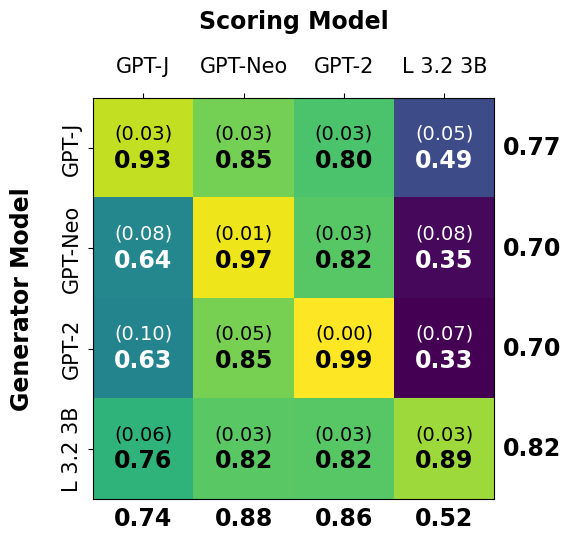

In [34]:
cross_stack = np.stack(list(cross.values()), axis=0)
cross_mean = np.mean(cross_stack, axis=0)
cross_sem = np.std(cross_stack, axis=0, ddof=1) / np.sqrt(cross_stack.shape[0])
row_means = cross_mean.mean(axis=1)
col_means = cross_mean.mean(axis=0)

nrows, ncols = cross_mean.shape

fig, ax = plt.subplots(figsize=(6,6))
cax = ax.imshow(cross_mean, aspect='equal', interpolation='nearest')

y_off = 0.24
for i in range(nrows):
    for j in range(ncols):
        color = 'white' if cross_mean[i,j] < 0.7 else 'black'
        ax.text(j, i + y_off, f"{cross_mean[i,j]:.2f}", ha='center', va='bottom', fontweight='bold', color=color)
        ax.text(j, i - y_off, f"({cross_sem[i,j]:.2f})", ha='center', va='top', fontsize=14, fontweight='normal', color=color)

# 4) configure tick locations
ax.set_xticks(np.arange(ncols))
ax.set_yticks(np.arange(nrows))
ax.set_xticklabels(models) 
ax.set_yticklabels(models, rotation=90, rotation_mode='anchor', ha='center', va='center')
ax.tick_params(axis='y', pad=12)
ax.tick_params(axis='x', pad=12, top=True, bottom=False, labeltop=True, labelbottom=False)

ax.set_xlabel('Scoring Model', fontweight='bold', labelpad=20)
ax.set_ylabel('Generator Model', fontweight='bold', labelpad=20)
ax.xaxis.set_label_position('top')

for i, rm in enumerate(row_means):
    ax.text(1.02, i, f"{rm:.2f}", transform=ax.get_yaxis_transform(), ha='left', va='center', fontweight='bold')

for j, cm in enumerate(col_means):
    ax.text(j, -0.02, f"{cm:.2f}", transform=ax.get_xaxis_transform(), ha='center', va='top', fontweight='bold')

fig.tight_layout()
fig.savefig('cross.eps', bbox_inches='tight', pad_inches=0)
fig.savefig('cross.png', bbox_inches='tight', pad_inches=0, dpi=400)


In [35]:
mask_temp = {
    'GPT-2/T5-large': {
        'xsum': np.array([0.956, 0.960, 0.956, 0.919, 0.862]),
        'squad': np.array([0.939, 0.938, 0.943, 0.919, 0.862]),
        'writing': np.array([0.957, 0.963, 0.966, 0.918, 0.89])
    },
    'Llama 3B 3.2/T5-3b': {
        'xsum': np.array([0.909, 0.926, 0.932, 0.862, 0.800]),
        'squad': np.array([0.794, 0.806, 0.823, 0.812, 0.713]),
        'writing': np.array([0.922, 0.936, 0.937, 0.885, 0.824])
    }
}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


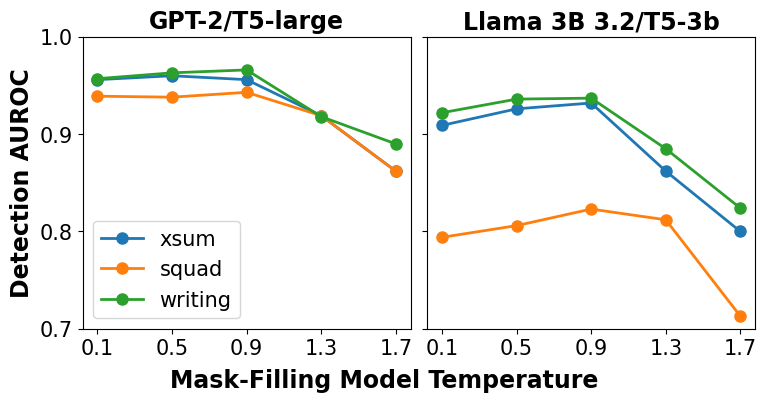

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=len(mask_temp), figsize=(8, 4), sharey=True)

mask_temp_vals = np.array([0.1, 0.5, 0.9, 1.3, 1.7])
for i, (model_name, scores) in enumerate(mask_temp.items()):
    ax[i].set_title(model_name)
    ax[i].set_xticks(mask_temp_vals)
    if i == 0:
        ax[i].set_ylabel('Detection AUROC')
    ax[i].set_ylim(0.7, 1)
    ax[i].set_yticks(np.arange(0.7, 1.01, 0.1))
    for dataset_name, aurocs in scores.items():
        ax[i].plot(mask_temp_vals, aurocs, label=dataset_name, marker='o', mew=1)
    if i == 0:
        ax[i].legend(loc='lower left')

fig.tight_layout()
fig.subplots_adjust(wspace=0.05) 
fig.supxlabel('Mask-Filling Model Temperature', y=-0.02, fontweight='bold', fontsize=ax[0].yaxis.label.get_fontsize())
fig.savefig('mask_temp.eps', bbox_inches='tight', pad_inches=0)
fig.savefig('mask_temp.png', bbox_inches='tight', pad_inches=0, dpi=400)

In [37]:
gen_temp = {
    'GPT-2': {
        'xsum': np.array([0.913, 0.975, 0.994, 0.991, 0.940, 0.823]),
        'squad': np.array([0.883, 0.943, 0.984, 0.989, 0.948, 0.804]),
        'writing': np.array([0.850, 0.913, 0.972, 0.994, 0.969, 0.890]),
    },
    'GPT-J': {
        'xsum': np.array([0.842, 0.949, 0.975, 0.949, 0.876, 0.598]),
        'squad': np.array([0.650, 0.781, 0.921, 0.871, 0.743, 0.499]),
        'writing': np.array([0.746, 0.826, 0.942, 0.952, 0.882, 0.677])
    }
}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


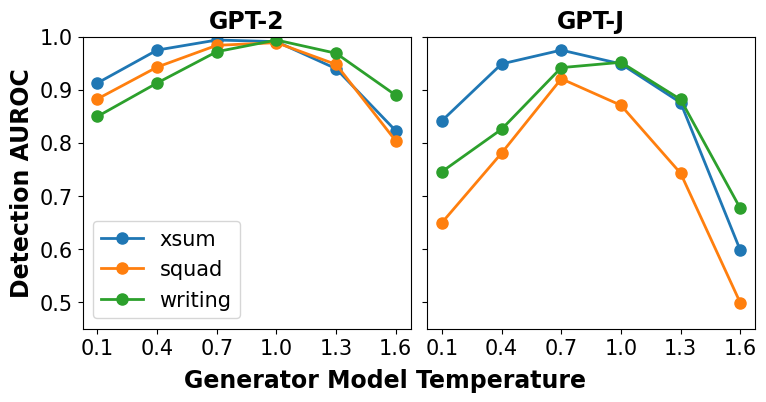

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=len(gen_temp), figsize=(8, 4), sharey=True)

gen_temp_vals = np.arange(0.1, 1.7, 0.3)
for i, (model_name, scores) in enumerate(gen_temp.items()):
    ax[i].set_title(model_name)
    ax[i].set_xticks(gen_temp_vals)
    if i ==0:
        ax[i].set_ylabel('Detection AUROC')
    ax[i].set_ylim(0.45, 1)
    ax[i].set_yticks(np.arange(0.5, 1.01, 0.1))
    for dataset_name, aurocs in scores.items():
        ax[i].plot(gen_temp_vals, aurocs, label=dataset_name, marker='o', mew=1)
    if i == 0:
        ax[i].legend(loc='lower left')

fig.tight_layout()
fig.subplots_adjust(wspace=0.05) 
fig.supxlabel('Generator Model Temperature', y=-0.02, fontweight='bold', fontsize=ax[0].yaxis.label.get_fontsize())
fig.savefig('gen_temp.eps', bbox_inches='tight', pad_inches=0)
fig.savefig('gen_temp.png', bbox_inches='tight', pad_inches=0, dpi=400)